In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv("/content/data.csv", parse_dates=["timestamp"])
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [62]:
missing = df.isnull().mean() * 100
missing[missing > 0].sort_values()

,0
zone9_temperature,4.585632
zone8_humidity,4.609361
zone4_humidity,4.633090
zone7_temperature,4.710209
outdoor_humidity,4.739871
zone1_humidity,4.751735
zone5_humidity,4.751735
zone3_temperature,4.757667
zone7_humidity,4.775464
outdoor_temperature,4.781396


In [63]:
df.describe()

,timestamp,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,2016-03-10 02:16:38.647446272,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
min,2016-01-11 17:00:00,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,2016-02-09 21:20:00,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,2016-03-10 00:10:00,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,2016-04-08 03:40:00,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,2016-12-01 15:50:00,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617
std,NaN,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631


In [64]:
df.shape

(16857, 29)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!git clone https://github.com/shilpisinghrathore/DS-Intern-Assignment-ShilpiSingh.git

Cloning into 'DS-Intern-Assignment-ShilpiSingh'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (13/13), 1.09 MiB | 6.23 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [16]:
!mv /content/DS_Intern_Assignment_ShilpiSingh.ipynb /content/DS-Intern-Assignment-ShilpiSingh/

In [13]:
from google.colab import files
uploaded = files.upload()

Saving DS_Intern_Assignment_ShilpiSingh.ipynb to DS_Intern_Assignment_ShilpiSingh.ipynb


In [14]:
!ls

data.csv  DS-Intern-Assignment-ShilpiSingh	  sample_data
drive	  DS_Intern_Assignment_ShilpiSingh.ipynb


In [17]:
%cd /content/DS-Intern-Assignment-ShilpiSingh/
!git config --global user.email "shilpisinghchill001@gmail.com"
!git config --global user.name "shilpisinghrathore"

/content/DS-Intern-Assignment-ShilpiSingh


In [20]:
!git add DS_Intern_Assignment_ShilpiSingh.ipynb


In [21]:
!git commit -m "Initial commit: added analysis notebook"

[main 3d5be13] Initial commit: added analysis notebook
 1 file changed, 1611 insertions(+)
 create mode 100644 DS_Intern_Assignment_ShilpiSingh.ipynb


In [66]:
!git add .
!git commit -m "Explored correlation of random_variable1/2 with target"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [24]:
# Time-based features
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

In [95]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature'],
      dtype='object')


In [96]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')

# Similarly, convert temperature and humidity columns to numeric (if needed)
df['zone1_temperature'] = pd.to_numeric(df['zone1_temperature'], errors='coerce')
df['zone1_humidity'] = pd.to_numeric(df['zone1_humidity'], errors='coerce')
df['zone2_temperature'] = pd.to_numeric(df['zone2_temperature'], errors='coerce')

# Check for any other non-numeric columns
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # Convert timestamp to datetime

In [97]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')

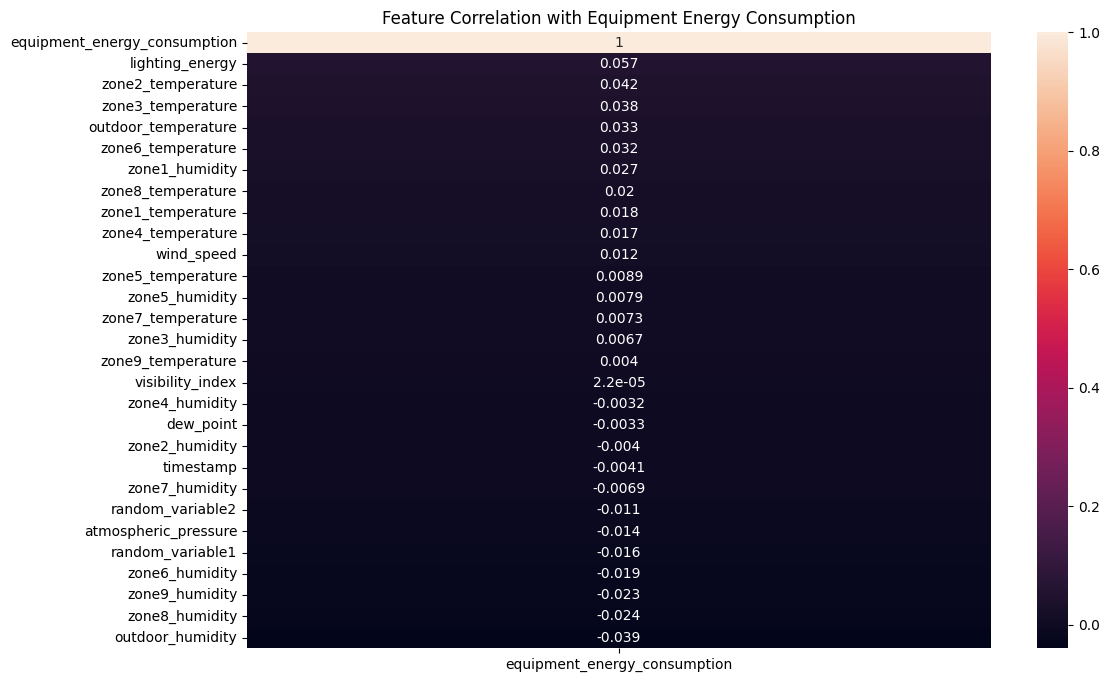

In [98]:
corr = df.corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['equipment_energy_consumption']].sort_values(by='equipment_energy_consumption', ascending=False), annot=True)
plt.title("Feature Correlation with Equipment Energy Consumption")
plt.show()

In [99]:
print("Correlation with random_variable1:", df['equipment_energy_consumption'].corr(df['random_variable1']))
print("Correlation with random_variable2:", df['equipment_energy_consumption'].corr(df['random_variable2']))

Correlation with random_variable1: -0.01615519898815763
Correlation with random_variable2: -0.011387127326762442


In [100]:
##Observation:** Both `random_variable1` and `random_variable2` have negligible correlation with the target variable and do not improve model performance in testing. We will exclude them from training.

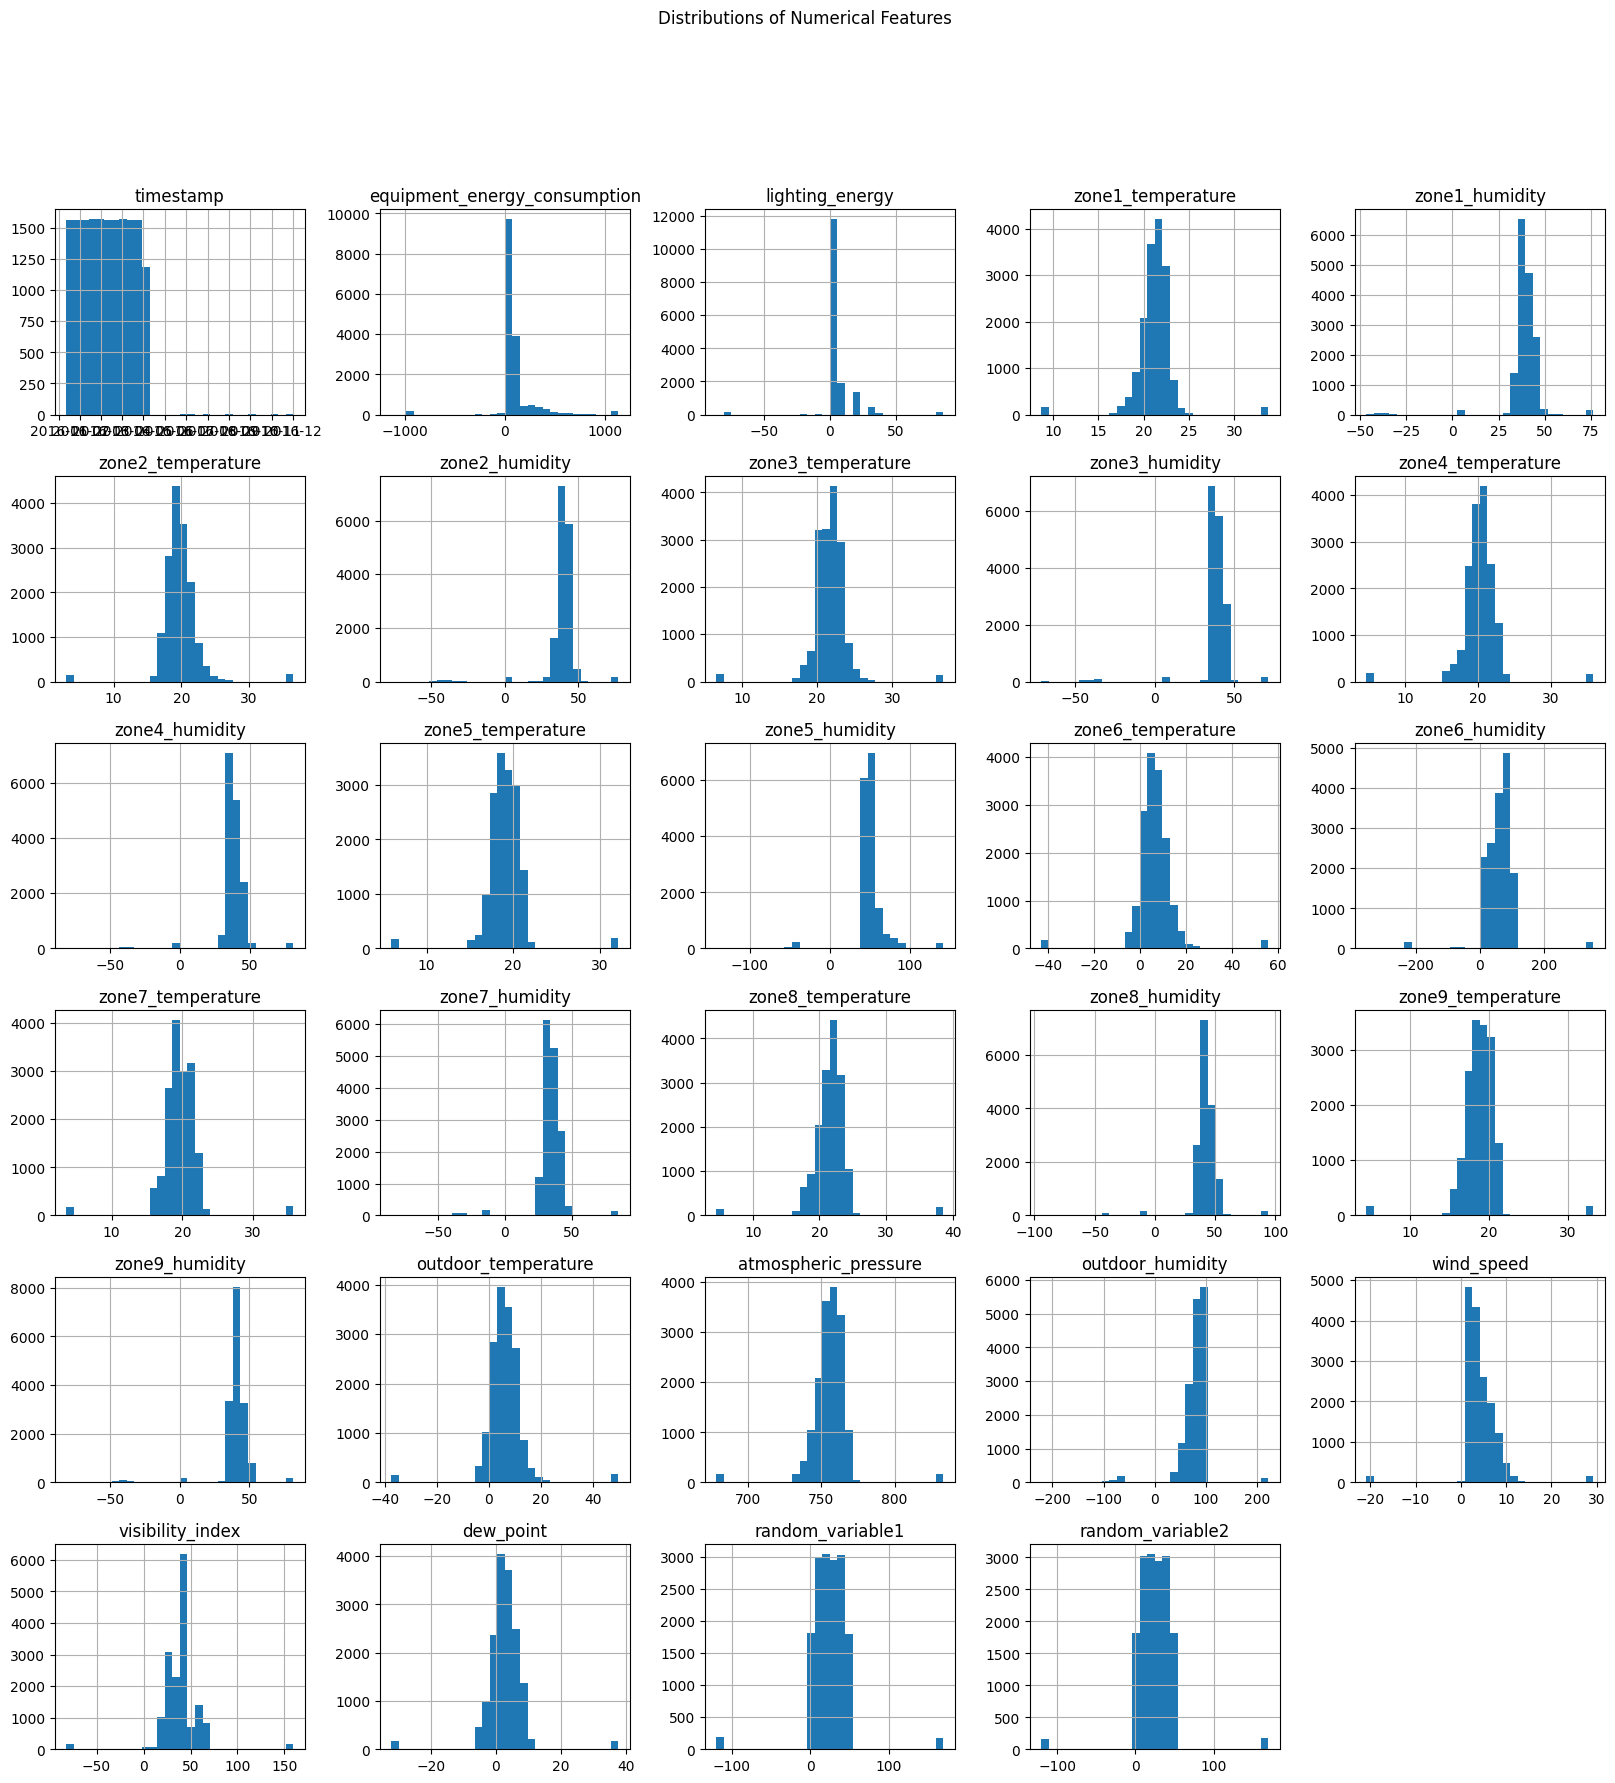

In [101]:
df.hist(figsize=(20, 20), bins=30)
plt.suptitle('Distributions of Numerical Features')
plt.show()


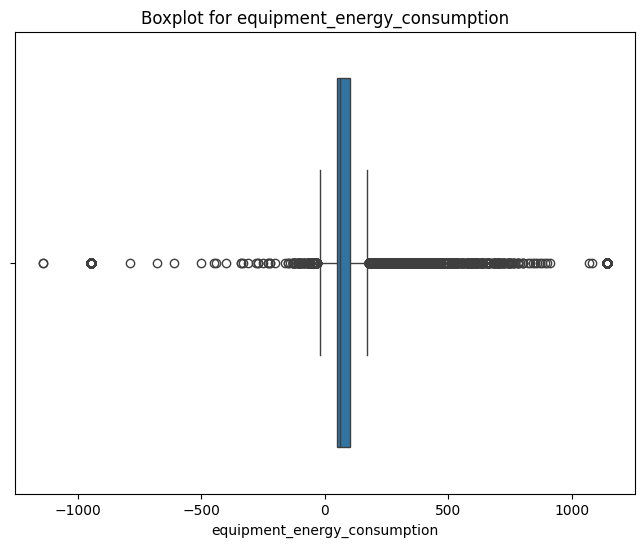

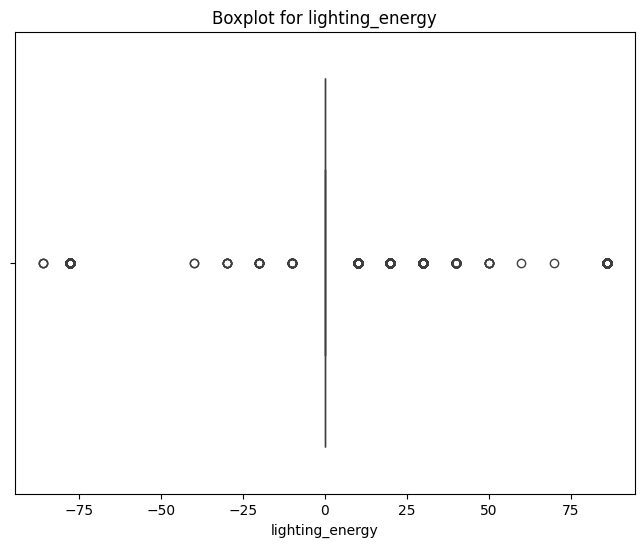

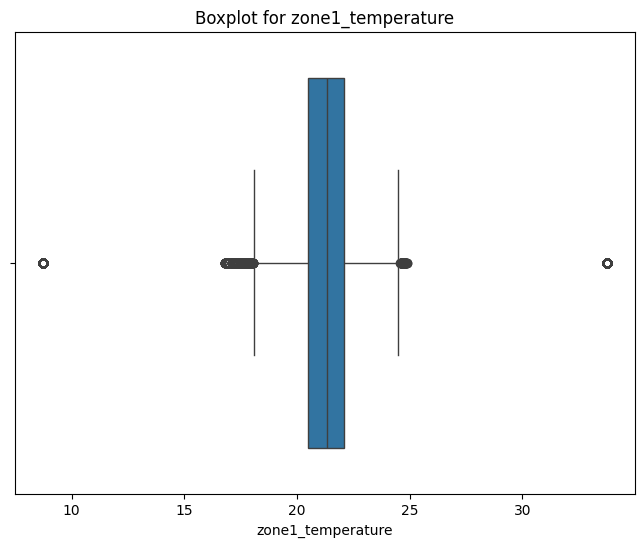

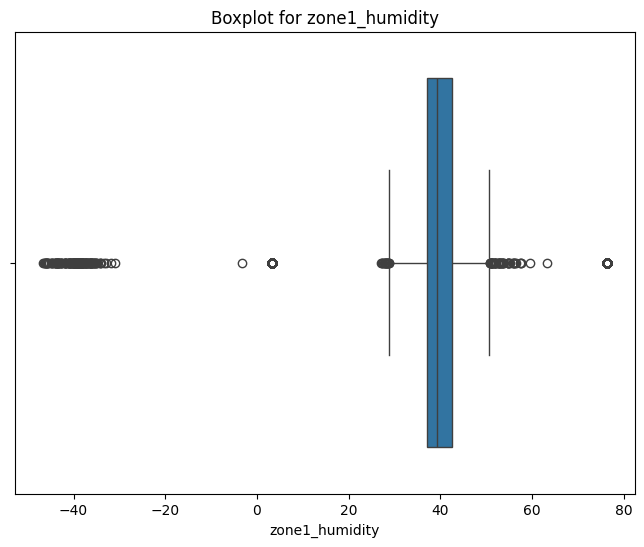

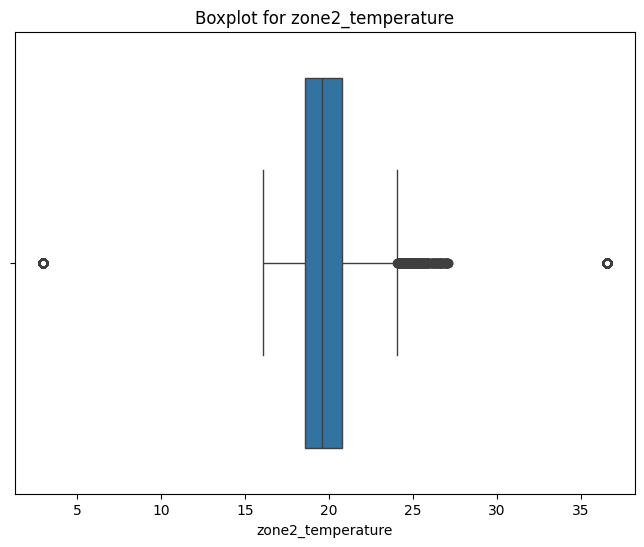

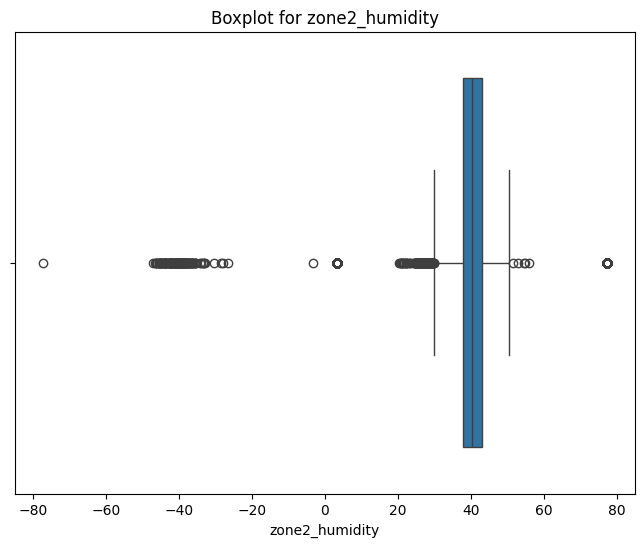

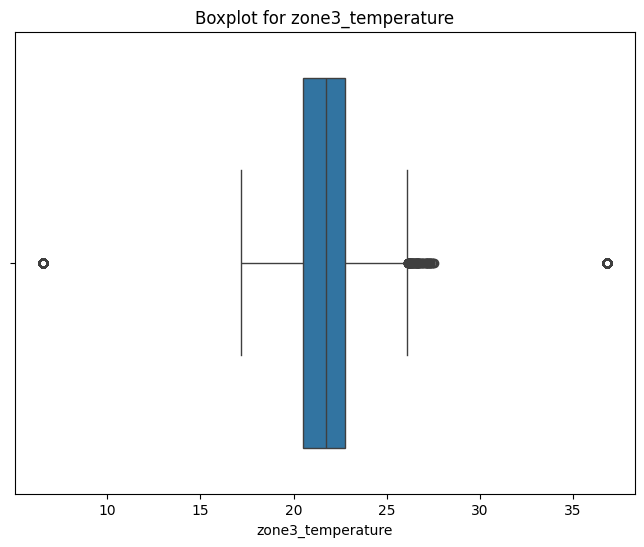

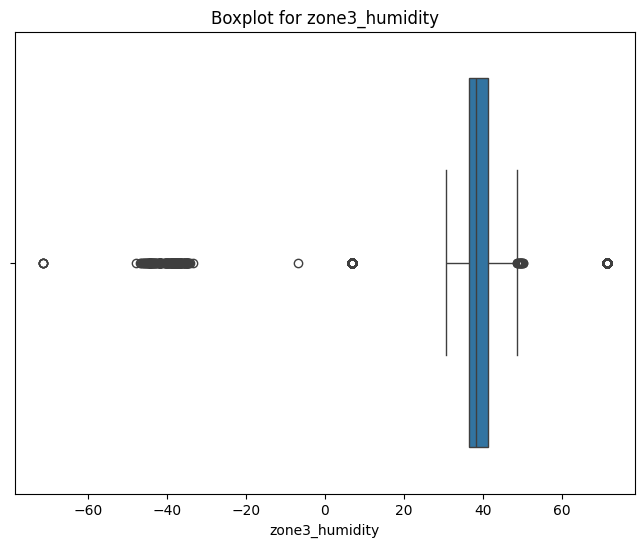

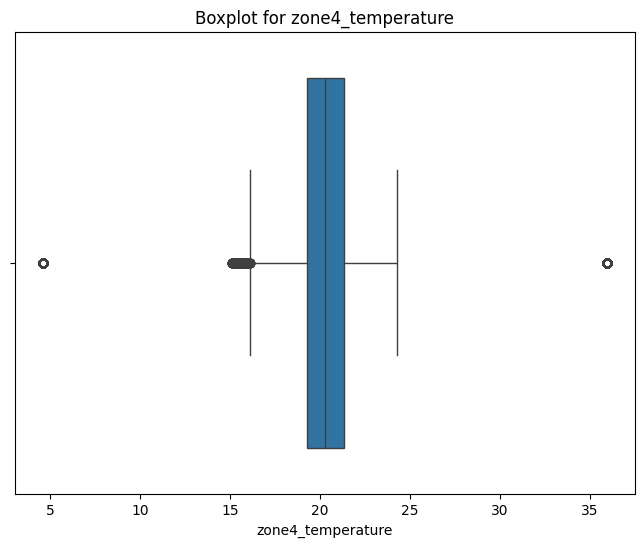

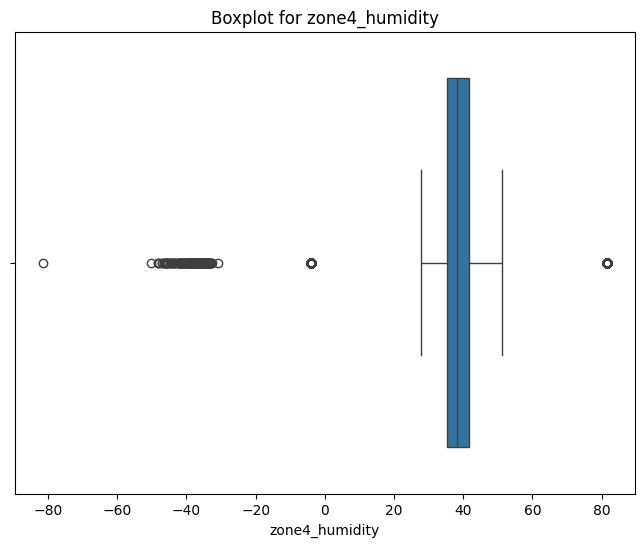

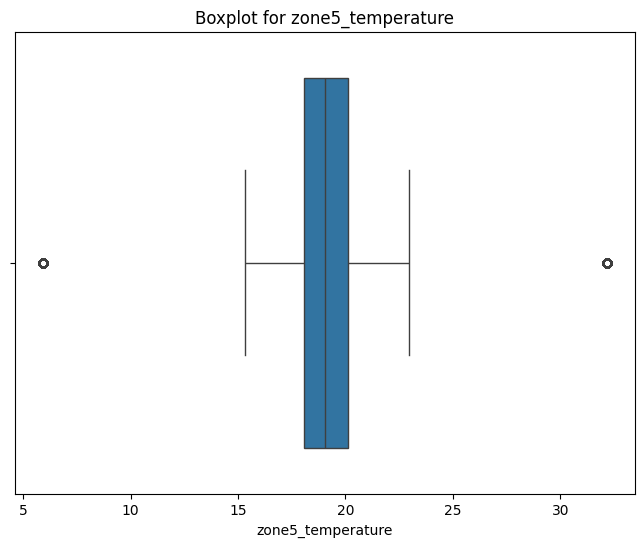

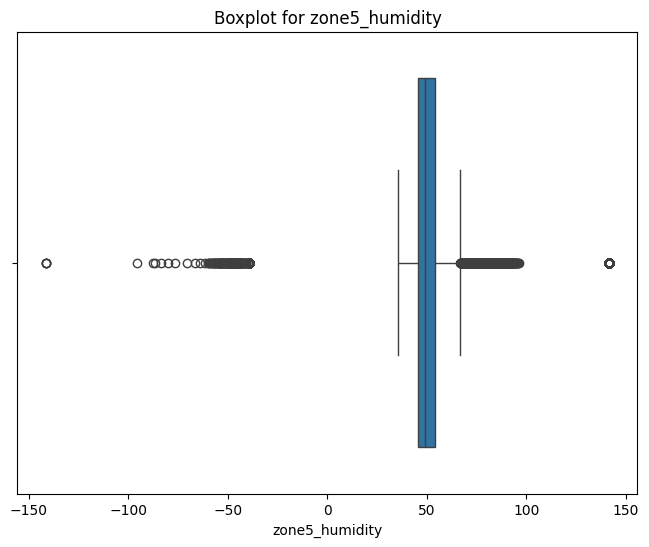

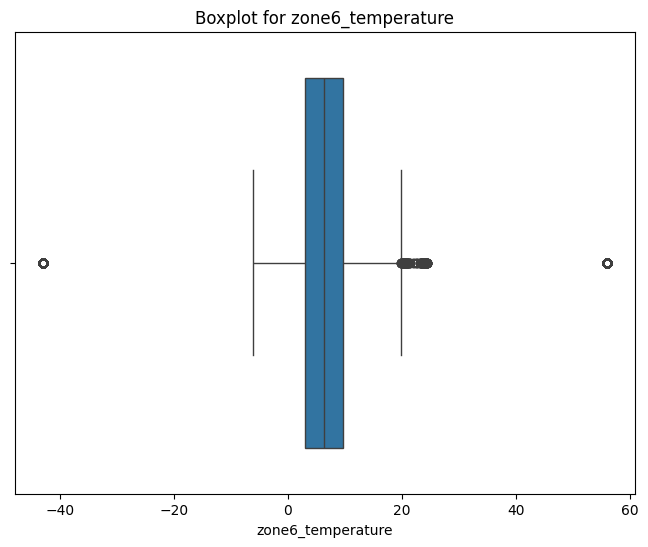

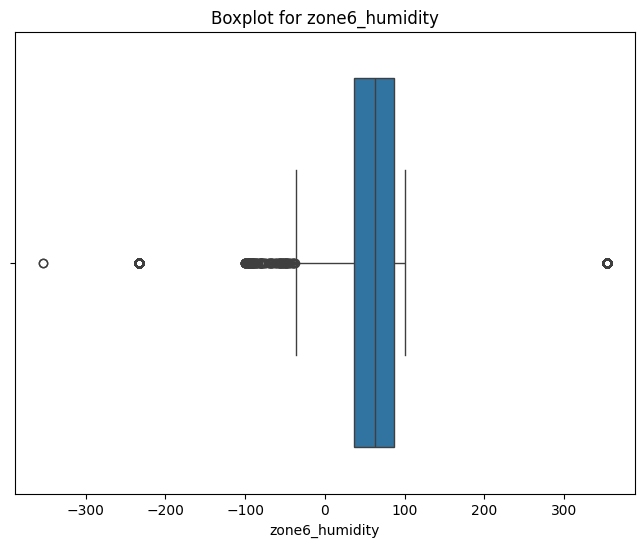

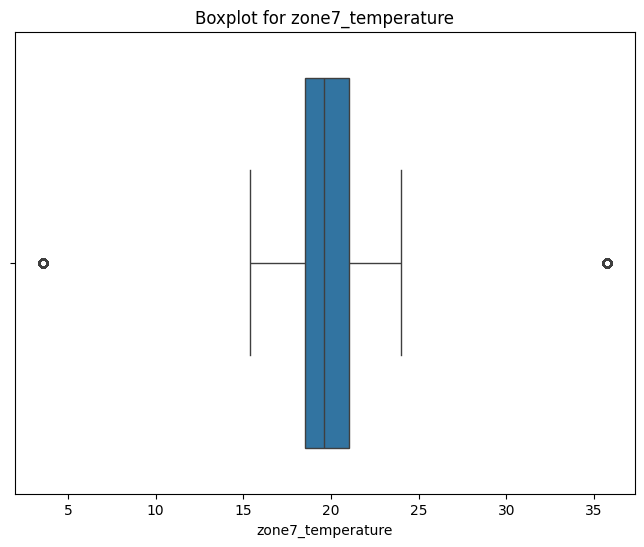

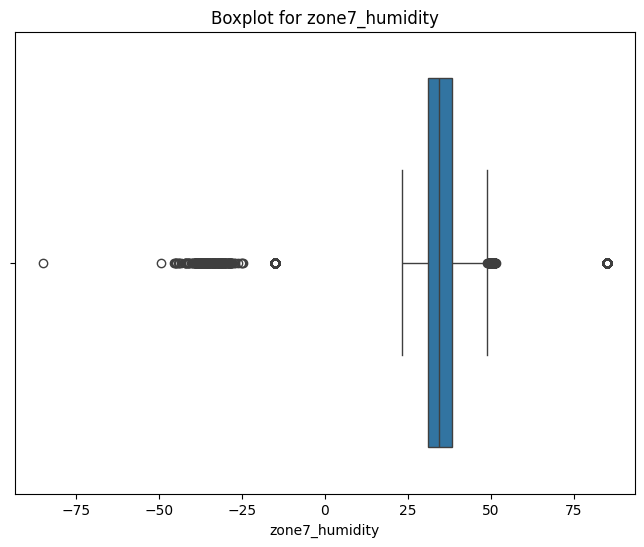

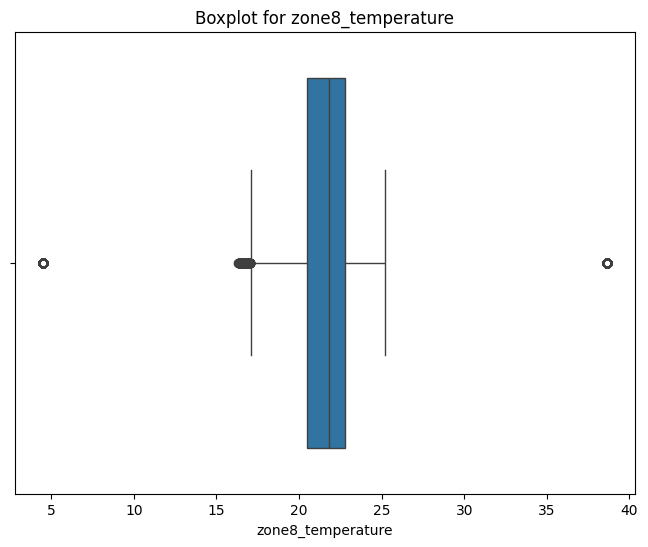

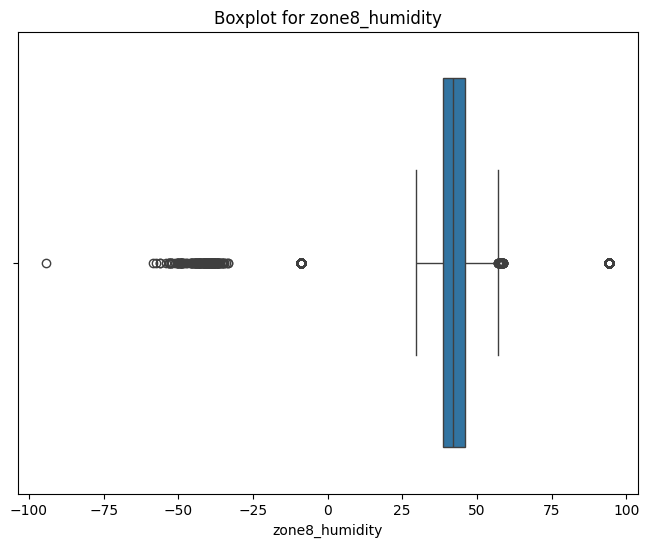

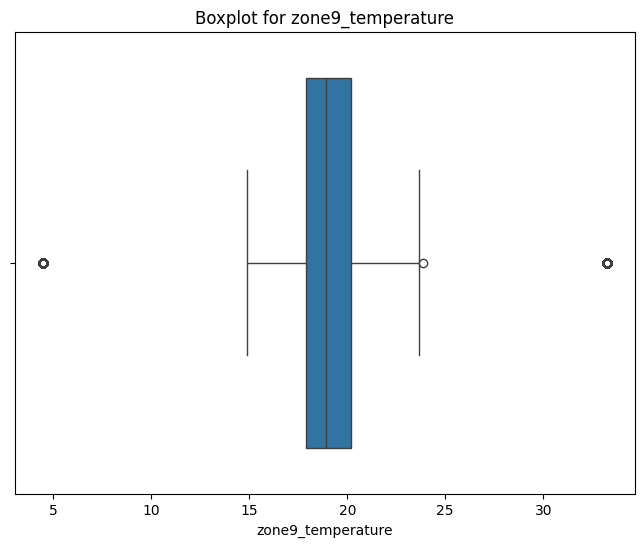

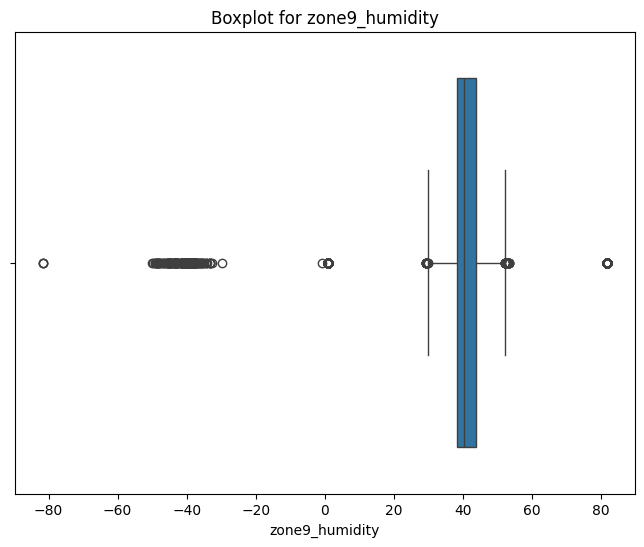

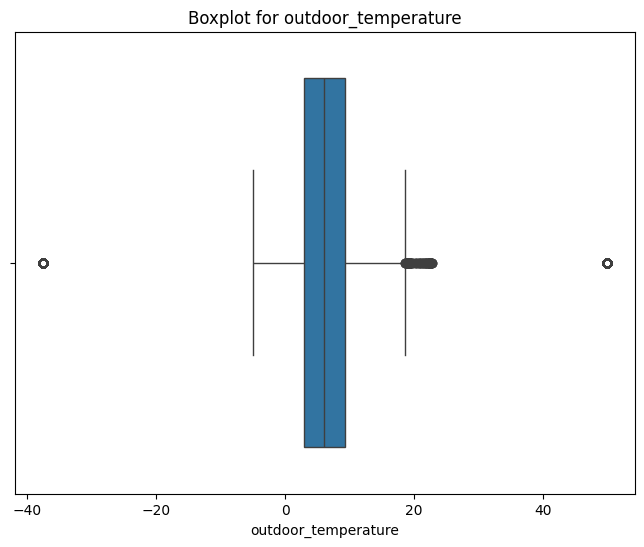

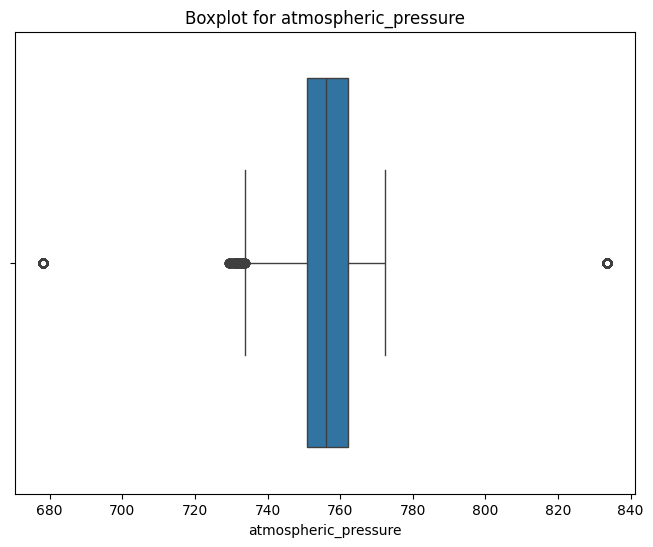

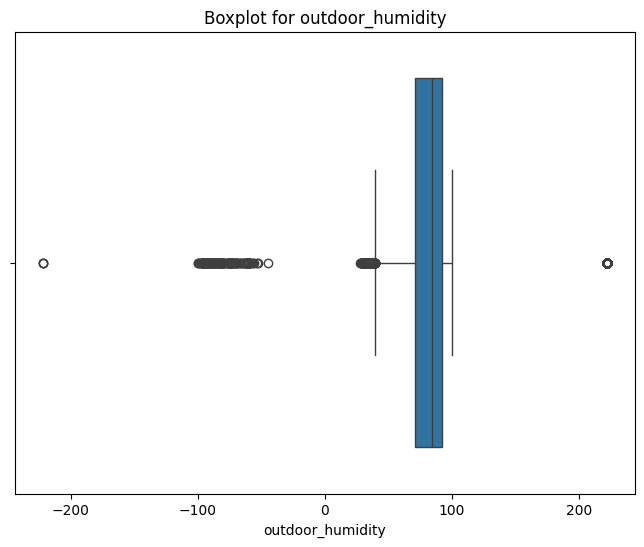

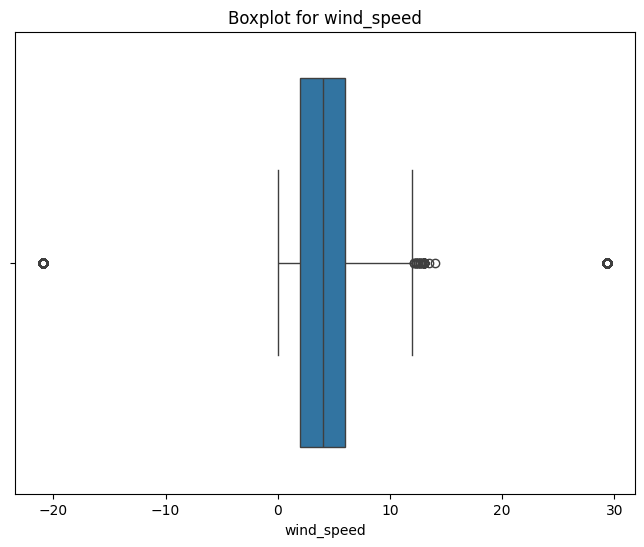

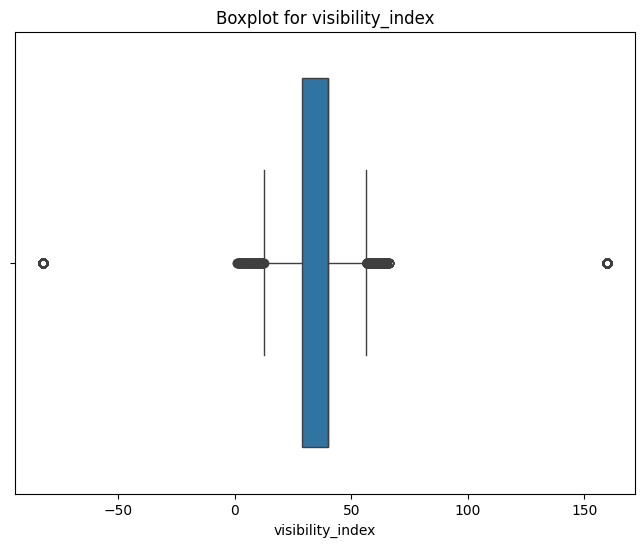

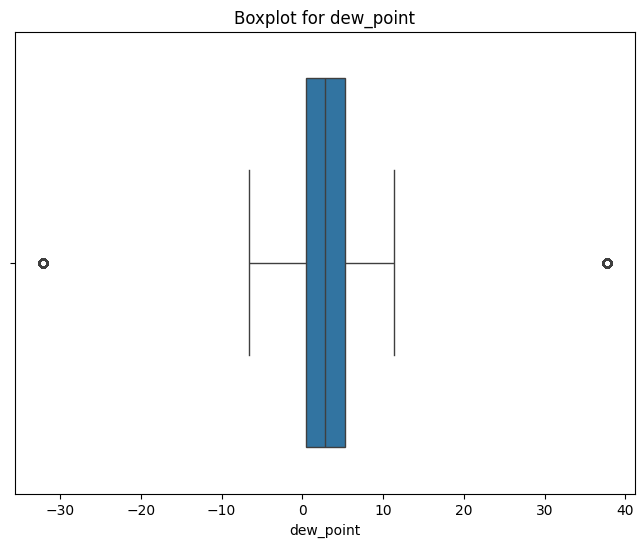

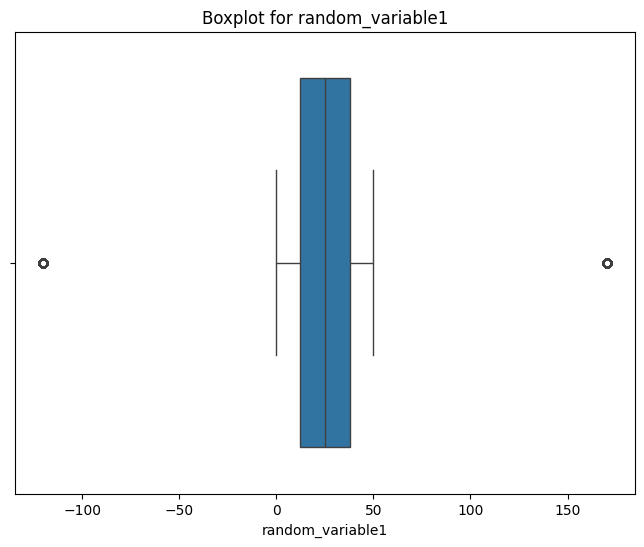

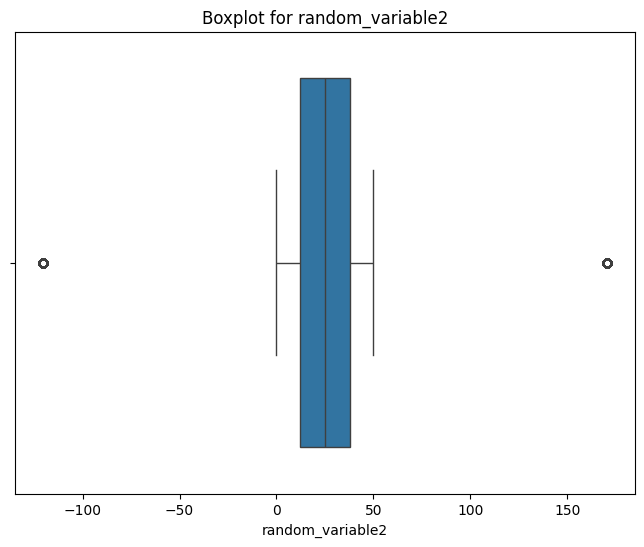

In [102]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [103]:
features = df.drop(columns=['timestamp', 'equipment_energy_consumption', 'random_variable1', 'random_variable2'])
target = df['equipment_energy_consumption']

In [104]:
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))

In [129]:
#Outliers and Data Transformation - Detect and handle outliers using Z-score

from scipy.stats.mstats import winsorize

# Apply winsorization on numeric columns (example with pandas DataFrame)
X_winsorized = X.copy()
for col in X.select_dtypes(include=np.number).columns:
    X_winsorized[col] = winsorize(X[col], limits=[0.01, 0.01])

In [106]:
# Remove rows with outliers
df_cleaned = df[~outliers]

In [107]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_cols]), columns=numerical_cols)

In [130]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [108]:

# Create interaction terms (e.g., temperature * humidity)
df_scaled['temp_humidity_interaction'] = df_scaled['zone1_temperature'] * df_scaled['zone1_humidity']

In [109]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

In [131]:
X = df_scaled.drop(columns=['equipment_energy_consumption'])
y = df_scaled['equipment_energy_consumption']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display first few rows after preprocessing
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (13485, 28)
Test data shape: (3372, 28)


In [133]:
df.shape

(16857, 32)

In [136]:


model = GradientBoostingRegressor(n_estimators=100, learning_rate =0.5, max_depth=9, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 1.267621500041148
R2 Score: -0.9069569910575679


In [137]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

In [138]:
model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.5, max_depth=9, random_state=42
)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# RMSE scorer (note: negate MSE because scoring functions are expected to be higher = better)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# R² scorer
r2_scorer = make_scorer(r2_score)

# Cross-validate
rmse_scores = cross_val_score(model, X_train, y_train, scoring=rmse_scorer, cv=cv)
r2_scores = cross_val_score(model, X_train, y_train, scoring=r2_scorer, cv=cv)

# Print average results
print("Cross-validated RMSE:", -np.mean(rmse_scores))
print("Cross-validated R2:", np.mean(r2_scores))

Cross-validated RMSE: 1.1576636660086081
Cross-validated R2: -0.29427035115928163


In [139]:
!git commit -m "Added final model and submission code"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [141]:
!git config --global credential.helper cache

In [146]:

!git push origin main

remote: Permission to shilpisinghrathore/DS-Intern-Assignment-ShilpiSingh.git denied to shilpisinghrathore.
fatal: unable to access 'https://github.com/shilpisinghrathore/DS-Intern-Assignment-ShilpiSingh.git/': The requested URL returned error: 403
